# Numerical Computing: Homework 2 

###### Authors:

* alberto.suarez@uam.es
* Student 1: Andrés Teruel Fernández (andres.teruel@estudiante.uam.es)

#### Instructions
* Turn in a single zip file
    1. Make sure that all cells can be exectued sequentially and without errors.
    2. The folder structure should allow the direct execution of the notebook without any modifications.
    3. All functions should be defined in a separate file. The notebook should contain only code to illustrate the answers.
    4. Submit a single file named: CN_2024_2025_HW2_\<lastNameStudent1\>_\<lastNameStudent2\>.zip

Example:     CN_2024_2025_HW2_moran_puig.zip

* The code should follow 
    * PEP 20 – The Zen of Python. https://peps.python.org/pep-0020    
    * PEP 8 – Style Guide for Python Code. <https://peps.python.org/pep-0008>
    * PEP 257 – Docstring Conventions. https://peps.python.org/pep-0257
    * Type hints. https://docs.python.org/3/library/typing.html
    * Mypy. https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html
    * Google Python sytle guide. https://google.github.io/styleguide/pyguide.html  

* Please use Markdown [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet] cells with formulas in latex for the derivations. Alternatively, insert a scanned image of the derivations, as it is here done with the Alan Turing [https://www.turing.org.uk/] picture.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import numerical_computing_HW_002_calculus as nc
# import my_numerical_computing_HW_002_calculus as nc

from typing import Callable, Tuple

%load_ext autoreload
%autoreload 2

### Taylor expansion in 1 dimension.

Consider a sufficiently smooth function $f(x)$, whose derivatives at $x_0$ exist up to order $K+1$, with the $(K+1)$th derivative continuous at that point. 

In the neighborhood of $x_0$, the function can be approximated by the (Taylor) series 
$$
\begin{eqnarray}
f(x) & = & \sum_{k=0}^{\infty} \frac{1}{k!} f^{(k)}\left(x_0\right)  \left(x-x_0\right)^k 
      = f(x_0) + f^{(1)}\left(x_0\right)  \left(x-x_0\right)
     + \frac{1}{2!} f^{(2)}\left(x_0\right)  \left(x-x_0\right)^2 
     + \frac{1}{3!} f^{(3)}\left(x_0\right)  \left(x-x_0\right)^3 
     + \ldots, 
\end{eqnarray}
$$
where
$$
\begin{eqnarray}
f^{(0)}\left(x_0\right) & = & f(x_0), \\
f^{(k)}\left(x_0\right) & = & \left. \frac{d^k f(x)}{d x^k}\right|_{x=x_0}, \ \ k = 1, 2, \ldots
\end{eqnarray}
$$
The series converges for $\left| x - x_0 \right| < R$, where $R$ is the radius of convergence.
The radius of convergence of the series is the distance from $x_0$ to the closest singularity of the function in the *complex* plane; that is, extending the definition of the function so that its argument is a complex number: $f(z)$, with $z\in \mathbb{C}$.

In the neighborhood of $x_0$, the function can be approximated by the (Taylor) polynomial: 
\begin{eqnarray}
f(x) & = & \sum_{k=0}^{K} \frac{1}{k!} f^{(k)}\left(x_0\right)  \left(x-x_0\right)^k + E_K(x)\\
     & = & f(x_0) + f^{(1)}\left(x_0\right)  \left(x-x_0\right) + \frac{1}{2!} f^{(2)}\left(x_0\right)  \left(x-x_0\right)^2 + \ldots + \frac{1}{K!} f^{(K)}\left(x_0\right)  \left(x-x_0\right)^K  + E_K(x).
\end{eqnarray}
The residual (error of the approximation) in the Lagrange form is 
$$
E_K(x) = \frac{1}{(K+1)!} f^{(K+1)}\left(\xi\right) \left(\xi - x_0\right)^{K+1}, \quad \text{ for some } \xi \in \left[x_0, x \right].
$$

Therefore, the approximation error due to truncation of the series is $\mathcal{O}\left( \left|x - x_0\right|^{K+1}\right)$.

\begin{eqnarray}
f(x) & \approx & f(x_0) + f^{(1)}\left(x_0\right)  \left(x-x_0\right) + \frac{1}{2!} f^{(2)}\left(x_0\right)  \left(x-x_0\right)^2 + \ldots + \frac{1}{K!} f^{(K)}\left(x_0\right)  \left(x-x_0\right)^K  + \mathcal{O}\left( \left(x - x_0\right)^{K+1}\right).
\end{eqnarray}


*Example*: 
The Taylor series of the exponential function is
$$
e^{x} = \sum_{k=0}^{\infty} \frac{1}{k!} x^k, \quad \left| \right| < \infty$.
$$

To see the radius of convergence of the series is $R = \infty$, we consider 
the extension of the definition of the exponential to the complex plane, and observe, using Euler's formula that
$$
e^z = e^{\text{Re}(z)} e^{i \text{Im}(z)}  = e^{\text{Re}(z)} \left( \cos\left(\text{Im}(z)\right) + i \sin\left(\text{Im}(z)\right)  \right),
$$
has no singularities for finite $z \in \mathbb{C}$.


### Taylor expansion in several dimensions.
$$
f(\mathbf{x}) \approx f(\mathbf{x}_0) + (\mathbf{x} - \mathbf{x}_0)^\top \boldsymbol{\nabla} f(\mathbf{x}_0) + \frac{1}{2} (\mathbf{x} - \mathbf{x}_0)^\top \mathbf{H}(\mathbf{x}_0) (\mathbf{x} - \mathbf{x}_0) + \frac{1}{3!} (\mathbf{x} - \mathbf{x}_0)^\top \mathbf{T}(\mathbf{x}_0) (\mathbf{x} - \mathbf{x}_0) (\mathbf{x} - \mathbf{x}_0) + \mathcal{O}\left( \left\| \mathbf{x} - \mathbf{x}_0 \right\|^4 \right),
$$
where 
$$
\boldsymbol{\nabla} f(\mathbf{x}_0) = \left. \frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} \right|_{\mathbf{x}=\mathbf{x}_0} 
$$ 
is the gradient of the function evaluated at $\mathbf{x}_0$. 
The elements of the gradient are:
$$
\nabla_i f(\mathbf{x}_0) = \left. \frac{\partial f(\mathbf{x})}{\partial x_i}\right|_{\mathbf{x}=\mathbf{x}_0}.
$$
Using index notation, the second order term in the Taylor series is
$$
\sum_{i=1}^D  \left(
\left. \frac{\partial f(\mathbf{x})}{\partial x_i}\right|_{\mathbf{x}=\mathbf{x}_0}  (x_i - x_{0,i})
\right).
$$
The Hessian matrix is 
$$
\mathbf{H}(\mathbf{x}_0) = \boldsymbol{\nabla} \boldsymbol{\nabla} f(\mathbf{x}_0) = \left. \frac{\partial^2 f(\mathbf{x})}{\partial \mathbf{x} \partial \mathbf{x}} \right|_{\mathbf{x}=\mathbf{x}_0}.
$$
The elements of the Hessian matrix are the second derivatives of the function, evaluated at $ \mathbf{x}_0$:
$$
H_{ij}(\mathbf{x}_0) = \left. \frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j}\right|_{\mathbf{x}=\mathbf{x}_0}.
$$
Using index notation, the second order term in the Taylor series is
$$
\frac{1}{2!} \sum_{i=1}^D \sum_{j=1}^D \left( 
\left. \frac{\partial^2 f(\mathbf{x})}{\partial x_i \partial x_j}\right|_{\mathbf{x}=\mathbf{x}_0}  (x_i - x_{0,i}) (x_j - x_{0,j})
\right).
$$

The third-derivative tensor evaluate at $\mathbf{x}_0$ is 
$$
\mathbf{T}(\mathbf{x}_0) 
= \boldsymbol{\nabla}\boldsymbol{\nabla} \boldsymbol{\nabla} f(\mathbf{x}_0) 
= \left. \frac{\partial^3 f(\mathbf{x})}{\partial \mathbf{x} \partial \mathbf{x} \partial \mathbf{x}} \right|_{\mathbf{x}=\mathbf{x}_0}. 
$$
Using index notation, the third order term in the Taylor series is
$$
\frac{1}{3!} \sum_{i=1}^D \sum_{j=1}^D \sum_{k=1}^D \left(
\left. \frac{\partial^3 f(\mathbf{x})}{\partial x_i \partial x_j \partial x_k}\right|_{\mathbf{x}=\mathbf{x}_0}  (x_i - x_{0,i}) (x_j - x_{0,j}) (x_k - x_{0,k}) 
\right).
$$

### Exercise 1: Taylor expansion

Implement the function `taylor_approximation` in the file `my_numerical_computation_HW_002_calculus.py`, which has been imported as `nc`.


In [2]:
# Plot of Taylor approximations of different orders

def plot_taylor_approximation(
    function: Callable[[float], float], 
    function_derivative: Callable[[float, int], float], 
    K: int,
    x_0: float,
    interval_plot: Tuple[float, float],
    figure_size: Tuple[int, int],
) -> None:
    
    x = np.linspace(*interval_plot, num=1000)
    y_exact = function(x)
    y_taylor = nc.taylor_approximation(x, function, function_derivative, K, x_0)
    
    fig, axs = plt.subplots(K + 1, 2, sharex=True, figsize=figure_size)
    
    for k, y in enumerate(y_taylor):
        axs[k, 0].plot(x, y_exact, label='exact')
        axs[k, 0].plot(x, y_taylor[k, :], label='Taylor(k = {:d})'.format(k))
        axs[k, 0].set_xlabel('$x$')
        axs[k, 0].set_ylabel('$f(x)$')
        axs[k, 0].legend()
    
        error = y_taylor[k, :] - y_exact 
        axs[k, 1].plot(x, error, label='error')
        axs[k, 1].set_xlabel('$x$')
        axs[k, 1].set_ylabel('$error$')
        axs[k, 1].legend()
        axs[k, 1].axhline(y = 0.0, color = 'k', linestyle = ':')

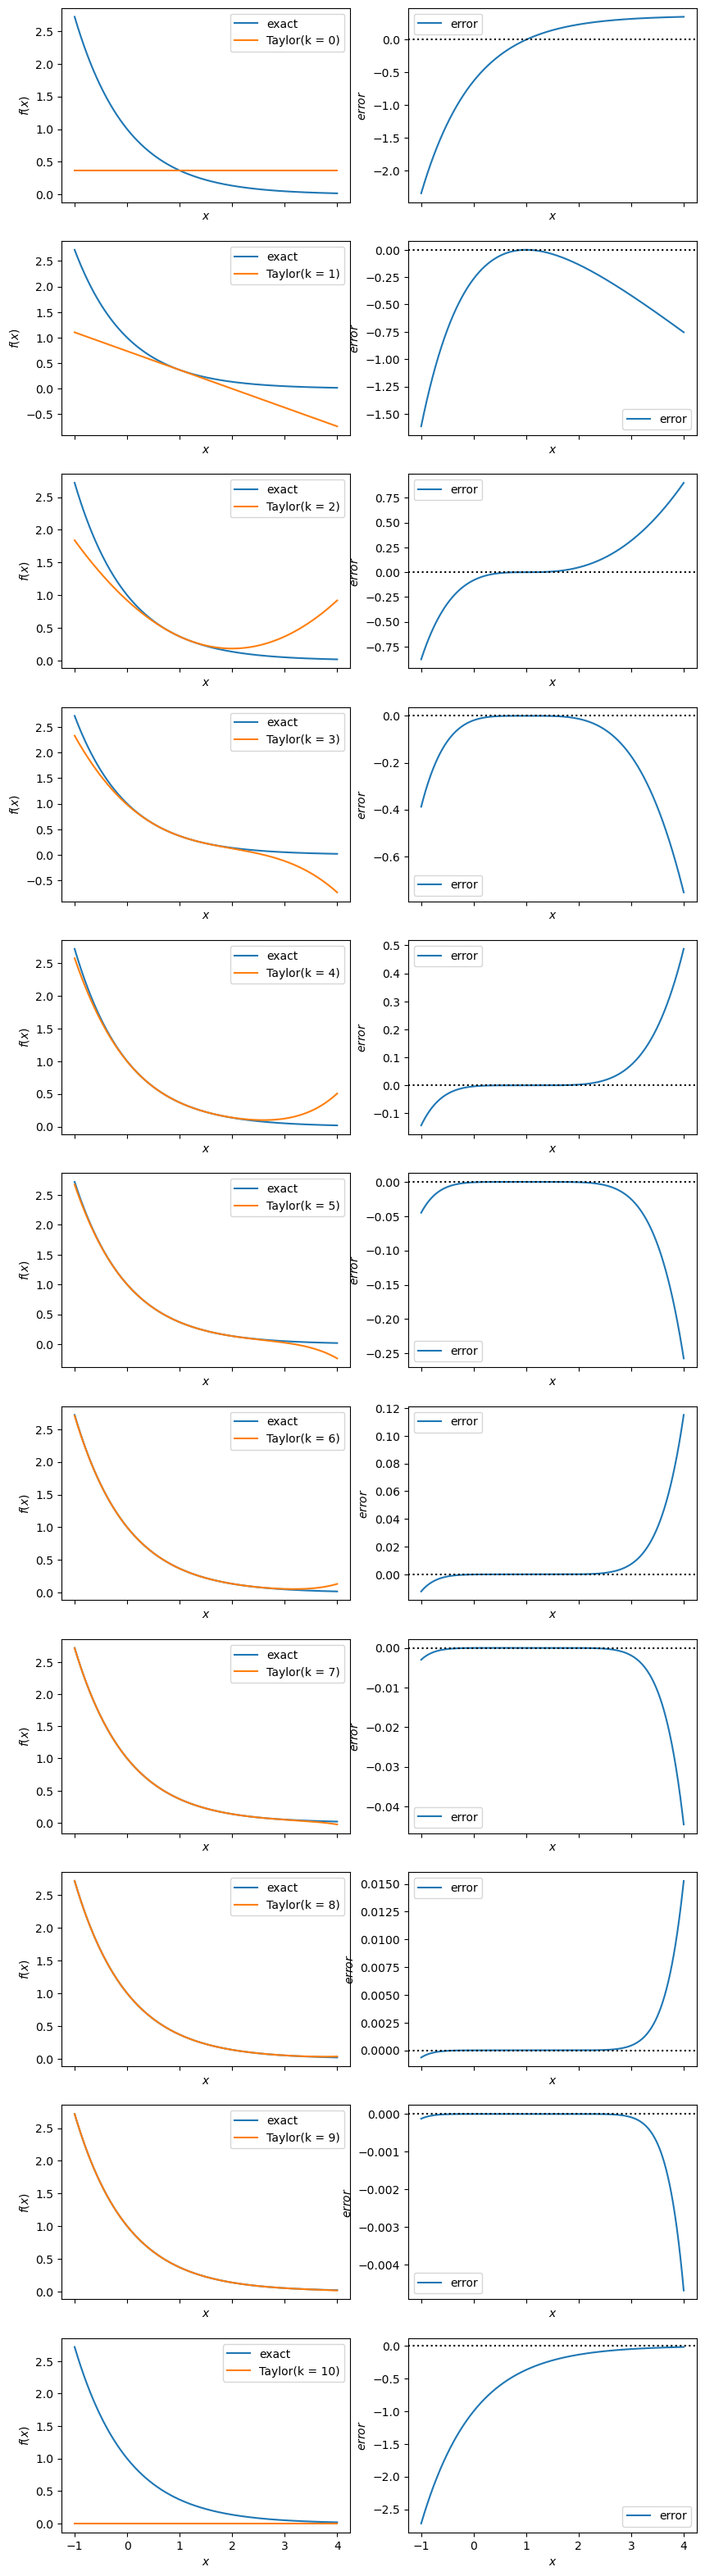

In [3]:
# Taylor approximation for the negative exponential 
    
x_0 = 1.0
K = 10
plot_taylor_approximation(
    function=lambda x: np.exp(- x), 
    function_derivative=lambda x, k: (1 - 2 * (k % 2)) * np.exp(- x), 
    K=K,
    x_0=x_0,
    interval_plot=(x_0 - 2.0, x_0 + 3.0),
    figure_size=(K, 4*K),
)

### Exercise 2: Properties of the Taylor expansion.

For each of these functions
$$
\begin{eqnarray}
f_1(x) & = &  \sin(x), \\
f_2(x) & = &  \log{(1 + x)}, \\
f_3(x) & = &  \frac{1}{1 + x}, \\
f_4(x) & = &  \frac{1}{1 + x^2}.
\end{eqnarray}
$$
1. Provide an expression of the Taylor series around $x_0 = 0.0$ of the form
$$
f(x) = \sum_{k=0}^{\infty} c_k x^k.
$$
In other words, find the expression of $c_k$ in terms of $k$ for each of the functions considered.
2. Determine the radius of covergence of each of these series by locating the singularity that is closest to $x_0$ in the complex plane. 
3. Make a plot similar to the one in the previous cell to illustrate the convergence of these approximations.

#### My Response:

**Part 1: Expression for the Taylor series**

Taking into consideration that $x_0 = 0.0$:

1. $f_1(x) = \sin(x) = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k+1)!} $

2. $f_2(x) = \log(1+x) = \sum_{k=0}^\infty \frac{(-1)^{k+1} x^k}{k}$

3. $f_3(x) = \frac{1}{1 + x} = \sum_{k=0}^\infty (-1)^{k} x^k$

4. $f_4(x) = \frac{1}{1 + x ^ 2} = \sum_{k=0}^\infty (-1)^n x^{2n}$

**Part 2: Radious of convergence**

I don't really know what this part means.

**Part 3: Plots:**

### Exercise 3: Asymptotic expansions.

In some cases is useful to make expansions around singular points. https://aofa.cs.princeton.edu/40asymptotic/

Of particular interest are expansions about infinity.

For instance,
$$
\log \left(N + 1 \right) = \log N + \log\left(1 + \frac{1}{N}\right) \sim  \log N + \frac{1}{N} - \frac{1}{2} \frac{1}{N^2}  + \mathcal{O}\left(\frac{1}{N^3}\right) 
$$

For the factorial of large numbers, one can use Stirling's approximation:
$$
N! = \Gamma \left(N + 1\right) \approx \sqrt{2 \pi N} \left( \frac{N}{e} \right)^N \left( 1 + \frac{1}{12 N} + \frac{1}{288 N^2} \right) + \mathcal{O}\left(\frac{1}{N^3} \right)
$$
where $\Gamma(x)$ with $x \in \mathbb{R}$ is the Gamma function [https://en.wikipedia.org/wiki/Gamma_function](https://en.wikipedia.org/wiki/Gamma_function)].


* Explore the dependence on $N$ of the magnitude of the error of Stirling's approximation truncanted at different orders.  
* Determine the smallest values of $N$ for which the approximation $N! = \Gamma \left(N + 1\right) \sqrt{2 \pi N} \left( \frac{N}{e} \right)^N$ has relative errors below $1 \%$, $1$ per thousand, and $1.0e-5$.

NOTE: 
If $N$ is very large, it may be necessary to use the logarithm of the factorial
$$
\log N! 
= \log \prod_{n=1}^N n 
= \sum_{n=1}^N \log n 
\approx N \log N - N + \frac{1}{2} \log N + \frac{1}{2} \log(2 \pi) + \frac{1}{12 N} - \frac{1}{360 N^3} \mathcal{O}\left(\frac{1}{N^4} \right)
$$

REMINDER: Notation for the asymptotic behavior of functions.

Given a function $f(N)$, with $N \rightarrow \infty$ 
* $g(N) = \mathcal{O}\left(f(N)\right)$ means: $\left| \frac{g(N)}{f(N)} \right|$ as $N \rightarrow \infty$.
* $g(N) = \mathcal{o}\left(f(N)\right)$ means: $\lim_{N \rightarrow \infty} \frac{g(N)}{f(N)} = 0$. 
* $g(N) \sim f(N)$  means: $\lim_{N \rightarrow \infty} \frac{g(N)}{f(N)} = 1$.   


### Exercise 4. Estimation of derivatives by divided differences.

The derivative of a function $f(x)$ at $x_0$ measures the rate of variation of the function at that point.

We are given three formulas to calculate the derivative numerically:
* Left derivative:
$$
f'(x_0) \approx \frac{f(x_0) - f(x_0 - \Delta x)}{\Delta x} + \cal{O}\left(\left(\Delta x\right)^{n_{left}}\right).
$$
* Central derivative:
$$
f'(x_0) \approx \frac{f(x_0 + \Delta x) - f(x_0 - \Delta x)}{2 \Delta x} + \cal{O}\left(\left(\Delta x\right)^{n_{central}}\right).
$$
* Right derivative:
$$
f'(x_0) \approx \frac{f(x_0 + \Delta x) - f(x_0)}{\Delta x} + \cal{O}\left(\left(\Delta x \right)^{n_{right}}\right).
$$

1. Determine, using Taylor expansions to the appropriate order around $x_0$ the values of $n_{right}$, $n_{center}$, and $n_{left}$. 
2. According to the answer to the previous question, which formula should be used for the numerical estimation of $f'(x_0)$ using divided differences?.
3. For the numerical estimation of $f'(x_0)$, with  $x_0 \neq 0.0$, one should use $\Delta x = x_0 h$, for some small $h$. Explain why.

Our goal is to determine whay is the value of $h$ that is optimal, in the sense that the error of the numerical estimation of the derivatives by divided differences is as accurate as possible.

4. Determine by numerical exploration the optimal value of $h$ of each of the three formulas given earlier for the functions $f(x) = e^x$  at $x_0 = 1.0$.
5. Taking into consideration rounding and trunction errors, explain the behaviour observed of the error as a function of $h$. If possible provide an estimate of such errors for the values of $h$ considered.
6. Provide numerical estimates of the optimal value of $h$ for $f(x) = \log{x}$ at $x_0 = 10^{-30}$, at $x_0 = 1.0$, and at $x_0 = 10^{30}$.

### Exercise 5: Zeros of a function

1. Implement the bisection method. 
2. Implement the Newton-Raphson method.
3. Implement the method of the secant.
4. Vectorize the Newton-Raphson algorithm so that if an array of seeds is passed as an argument, the result is an array with the corresponding roots of the function.
6. From an iid sample $\left\{U_m \right\}_{m=1}^M, Z_m \sim U[0, 1]$, generate an iid sample $\left\{Z_m \right\}_{m=1}^M, Z_m \sim N(0,1)$ standard normal random numbers using the method of the inverse:
$$   
\begin{eqnarray}
U_m & \sim & U[0, 1] \\
Z_m & = & norminv\left(U_m\right), \quad m =1,\ldots, M.
\end{eqnarray}
$$
The inverse of the cdf of the standard normal distribution ($norminv$) should be calculated using only the functions `norm.pdf` and `norm.cdf` from `scipy.stats` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html, and the vectorized implementation of Newton-Raphson's method.
7. Generate a sample of size $M=10000$ and illustrate that the random numbers generated follow a standard normal distribution:
    1. Plot the empirical pdf (histogram) with $ nbins = 50$. Superimpose in the plot the scaled pdf.
    2. In a separate figure, make a normal probability plot.  https://en.wikipedia.org/wiki/Normal_probability_plot
    3. Generate a sample of the same size using the $numpy.random$ module. https://numpy.org/doc/stable/reference/random/index.html#random-quick-start. 
    4. Compare the two samples by making a quantile-quantile plot. https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot.

## Order of convergence.

In many numerical estimation methods the goal is to estimate a quantity, say $x^*$, using an iterative procedure. 

In an iterative algorithm one builds sequence $x_0, x_1, \ldots, x_n, \ldots$, which is expected to converge in the limit of large $n$ to the solution
$$
\lim_{n \rightarrow \infty} x_n = x^*.
$$

Assuming that the sequence has a limit (converges), the error of the approximation, given by the unknown quantity $ (x_n - x^*)$, can be approximated by 
$$
e_n =  \left|x_n - x_{n-1}\right|.
$$

For large $n$, the error is expected to decrease as  
$$ 
e_n \sim C \, (e_{n-1})^{\alpha}, \ \ n \rightarrow \infty 
$$ 
where $alpha$ is the order of (local) convergence of the algorithm, and 
$$ 
C = \lim_{n \rightarrow \infty} \frac{e_n}{(e_{n-1})^{\alpha}}.
$$ 


For instance, if $\alpha = 1$, the convergence is linear, for $\alpha = 2$ quadratic, and so on.

#### Example: The method of the bisection
In the method of the bisection $ e_{n} = \frac{1}{2} e_{n-1}.$
Therefore, the method has *linear convergence*. Furthermore, it always converges (global convergence) if the function changes sign between the endpoints of the initial interval.


### Exercise 5.1: Order of convergence of the Newton-Raphson method.

Consider the function $f(x)$ whose derivative $f'(x)$ is also known. Our goal is to find a vale $x = x^*$ such that $f(x^*) = 0.0$.

Newton-Raphson's method for the estimation of the zero consists of the following iteration, starting at x_0 (initial seed, given): 
$$ x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}, n = 1, 2,...  $$ 

In this manner, one obtains the sequence $x_0, x_1, \ldots, x_n, \ldots$, which is expected to converge in the limit of large n
$$
\lim_{n \rightarrow \infty} x_n = x^*.
$$

The algorithm is based on the following strategy: 
* Consider $x_{n-1}$, the estimate of $x^*$ at iteration $n-1$ of the algorithm.
* Assuming that we are close to convergence, we can improve the approximation of $x^*$ by finding the zero of the tangent of $f(x)$ at $x = x_{n-1}$. The formula of the tangent is
$$
t(x) = f(x_{n-1}) + f'(x_{n-1}) \left(x - x_{n-1}\right).
$$
We define $x_n$ as the value of $x$ such that $t(x_n) = 0$
$$
f(x_{n-1}) + f'(x_{n-1}) \left(x_n - x_{n-1}\right) = 0 \ \ \Longrightarrow x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}.  
$$

1. Does the algorithm guarantee finding a zero? (global convergence).
2. Does the algorithm guarantee finding a zero that is suffiently close to the seed? (local convergence).
2. Determine the order of (local) convergence (i.e., the value of $\alpha$) of this algorith.
3. Provide a graphical illustration of this order of convergence for the function $f(x) = e^{-x} - x$.
4. Taking into account rounding error, what is the smallest value (order of magnitude) of the relative error $\left(\frac{e_n}{x_n} \right)$ that we can expect to achieve?

### Exercise 6: Quadratures
1. Use broadcasting to compute using Simpson's rule the quadrature 
$$ \int_a^b \mathbf{f}(x) dx, \quad \quad \mathbf{f}^{\top}(x) = \left(f_1(x), \ldots, f_N(x)\right)$$ 
in a vectorized manner.

2. Consider the random vector $\mathbf{X} \sim \text{pdf}(\mathbf{x})$, with $X \in \mathbb{R}^D$. 
Code a function to compute the expected value of the function $g: \mathbb{R}^D \longrightarrow \mathbb{R}$ is $$\mathbb{E}\left[ g\left(\mathbb{X}\right) \right] = \int_{\mathbf{x} \in \mathbf{R}^D} \, d\mathbf{x} \, \text{pdf}(\mathbf{x}) \, g(\mathbf{x})
$$ 
Use `quad` for $D=1$, `dblquad` for $D=2$, and `tplquad` for $D=3$ from the module `scipy.integrate`. 
    
3. Derive the complexity of the algorithms assuming that the grid used is the same in all the dimensions.
    1. Monitor the complexity of the algorithm as a function of the dimension $D$. 
    2. How should one implement the quadrature for $D \ge 4$?
     
4. Consider the pdf of the $D$-dimensional multivariate Gaussian distribution
$$
\text{norm.pdf}\left(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}\right) = \frac{1}{\sqrt{(2\pi)^D |\boldsymbol{\Sigma}|}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right),
$$
where:
$$
\begin{align}
& \boldsymbol{\mu} \in \mathbb{R}^D \text{  is the mean vector}. \\
& \boldsymbol{\Sigma} \in \mathbb{R}^{D} \times \mathbb{R}^{D}  \text{  is the covariance matrix}.
& \left|\boldsymbol{\Sigma}\right| \text{   is the determinant of the covariance matrix} \boldsymbol{\Sigma}. 
\end{align}
$$

$$
\begin{align}
1 & = \int_{\mathbf{x} \in \mathbb{R}^D}  \, d\mathbf{x} \, \text{norm.pdf}\left(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}\right), \\
\boldsymbol{\mu} & = \mathbb{E}\left[\mathbf{X}\right] = \int_{\mathbf{x} \in \mathbb{R}^D}  \, d\mathbf{x} \, \text{norm.pdf}\left(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}\right) \, \mathbf{x}, \\
\boldsymbol{\Sigma} & = \text{var}\left(\mathbf{X}\right) = \mathbb{E}\left[\left(\mathbf{X} - \boldsymbol{\mu} \right) \, \left(\mathbf{X} - \boldsymbol{\mu} \right)^{\top}\right] = \int_{\mathbf{x} \in \mathbb{R}^D}  \, d\mathbf{x} \, \text{norm.pdf}\left(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}\right) \, \left(\mathbf{x} - \boldsymbol{\mu} \right) \, \left(\mathbf{x} - \boldsymbol{\mu} \right)^{\top}.
\end{align}
$$

* Illustrate these relations using a deterministic numerical quadrature algorithm for $D = 2$, $D=3$, and $D=4$. 
* Illustrate these relations using Montecarlo quadrature for $D = 2$, $D=3$, and $D=4$.
* Comment the results.


### Exercise 7: Numerical, symbolic, and automatic differentiation

1. Give a summary of differences between these three computational techniques to compute derivatives.
2. Give examples of use for automatic differentiation in the following platforms 
    1. Tensorflow. https://www.tensorflow.org/guide/autodiff
    2. Pytorch. https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html
    3. Ezyme (Julia). https://enzyme.mit.edu/julia/stable

**References**

Atılım Günes Baydin, Barak A. Pearlmutter, Alexey Andreyevich Radul, and Jeffrey Mark Siskind. 2017. 
Automatic differentiation in machine learning: a survey. 
J. Mach. Learn. Res. 18, 1 (January 2017), 5595–5637.
https://www.jmlr.org/papers/volume18/17-468/17-468.pdf


https://github.com/greyhatguy007/Mathematics-for-Machine-Learning-and-Data-Science-Specialization-Coursera/blob/main/C2/w1/C2_W1_Lab_1_differentiation_in_python.ipynb

https://www.cs.toronto.edu/~rgrosse/courses/csc421_2019/readings/L06%20Automatic%20Differentiation.pdf
